In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [7]:
# File paths (update these paths if necessary)
city_files = {
    "A": "data/cityA_groundtruthdata.csv.gz",
    "B": "data/cityB_challengedata.csv.gz",
    "C": "data/cityC_challengedata.csv.gz",
    "D": "data/cityD_challengedata.csv.gz"
}
poi_files = {
    "B": "data/POIdata_cityB.csv",
    "C": "data/POIdata_cityC.csv",
    "D": "data/POIdata_cityD.csv"
}
poi_categories_file = "data/POI_datacategories.csv"

### 1 Basic Statistics 

In [8]:
def load_data(file_path):
    return pd.read_csv(file_path)

def data_summary(df, name):
    print(f"=== {name} ===")
    print("Shape:", df.shape)
    print("First 5 Rows:\n", df.head())
    print("Info:\n", df.info())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Stats:\n", df.describe())

for city, file_path in city_files.items():
    df_city = load_data(file_path)
    data_summary(df_city, f"City {city} Mobility Data")


=== City A Mobility Data ===
Shape: (111535175, 5)
First 5 Rows:
    uid  d   t   x   y
0    0  0   1  79  86
1    0  0   2  79  86
2    0  0   8  77  86
3    0  0   9  77  86
4    0  0  19  81  89
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111535175 entries, 0 to 111535174
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 4.2 GB
Info:
 None
Missing Values:
 uid    0
d      0
t      0
x      0
y      0
dtype: int64
Summary Stats:
                 uid             d             t             x             y
count  1.115352e+08  1.115352e+08  1.115352e+08  1.115352e+08  1.115352e+08
mean   4.917461e+04  3.740868e+01  2.596529e+01  1.229079e+02  8.565036e+01
std    2.881183e+04  2.168145e+01  1.116733e+01  4.209912e+01  4.281913e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00
25%    2.393200e+04  1.900000e+0

### 2 Missing Vals 

In [9]:
for city, file_path in city_files.items():
    df_city = load_data(file_path)
    missing_x = (df_city['x'] == -999).sum()
    missing_y = (df_city['y'] == -999).sum()
    print(f"City {city} - Missing x-coordinates (-999): {missing_x}")
    print(f"City {city} - Missing y-coordinates (-999): {missing_y}")

# date + time distrubtion 
for city, file_path in city_files.items():
    df_city = load_data(file_path)
    df_city['datetime'] = pd.to_datetime(df_city['d'] + ' ' + df_city['t'])
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df_city['datetime'], bins=50, kde=False)
    plt.title(f"City {city} - Date and Time Distribution")
    plt.xlabel("Date and Time")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

City A - Missing x-coordinates (-999): 0
City A - Missing y-coordinates (-999): 0
City B - Missing x-coordinates (-999): 0
City B - Missing y-coordinates (-999): 0
City C - Missing x-coordinates (-999): 0
City C - Missing y-coordinates (-999): 0
City D - Missing x-coordinates (-999): 0
City D - Missing y-coordinates (-999): 0


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

### POI Data 

=== POI Categories Data ===
Shape: (84, 1)
First 5 Rows:
                          Food
0                    Shopping
1               Entertainment
2         Japanese restaurant
3          Western restaurant
4  Eat all you can restaurant
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Food    84 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes
Info:
 None
Missing Values:
 Food    0
dtype: int64
Summary Stats:
             Food
count         84
unique        84
top     Shopping
freq           1
=== City B POI Data ===
Shape: (56181, 4)
First 5 Rows:
    x  y  category  POI_count
0  1  1        79          2
1  1  1        84          1
2  1  2        82          1
3  1  3        54          1
4  1  3        74          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56181 entries, 0 to 56180
Data columns (total 4 columns):
 #   Column    

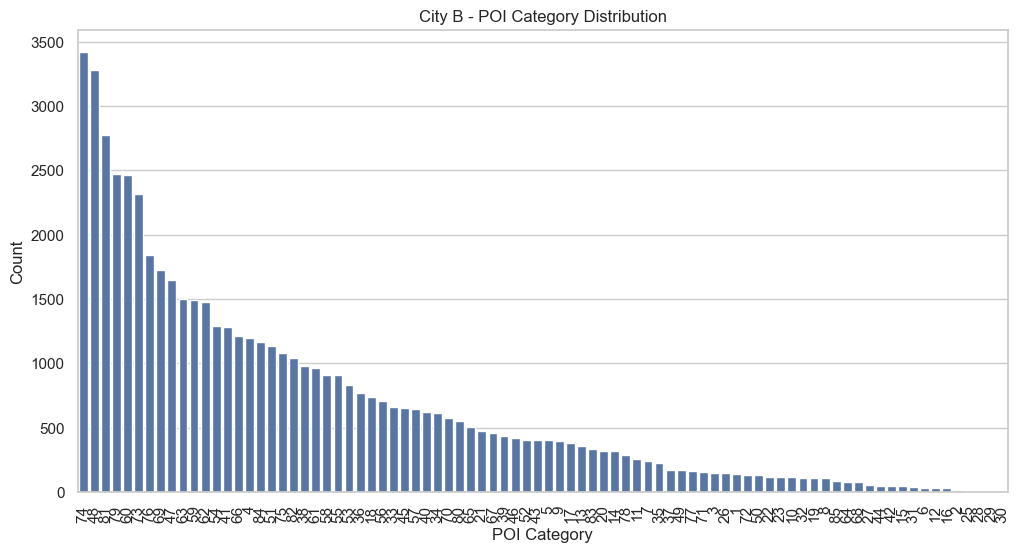

=== City C POI Data ===
Shape: (39064, 4)
First 5 Rows:
    x    y  category  POI_count
0  1   35        48          1
1  1   38        48          1
2  1   45        48          1
3  1   45        47          1
4  1  108        46          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39064 entries, 0 to 39063
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   x          39064 non-null  int64
 1   y          39064 non-null  int64
 2   category   39064 non-null  int64
 3   POI_count  39064 non-null  int64
dtypes: int64(4)
memory usage: 1.2 MB
Info:
 None
Missing Values:
 x            0
y            0
category     0
POI_count    0
dtype: int64
Summary Stats:
                   x             y      category     POI_count
count  39064.000000  39064.000000  39064.000000  39064.000000
mean      30.127790    148.614632     52.698674      2.830407
std       18.019165     32.264581     21.707894      6.797862
min        1.0000

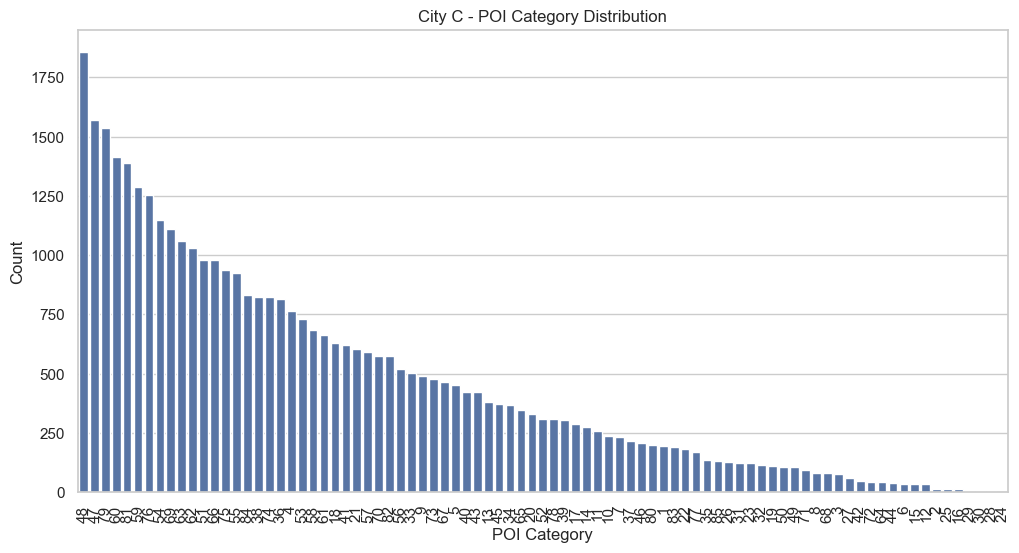

=== City D POI Data ===
Shape: (72794, 4)
First 5 Rows:
    x   y  category  POI_count
0  1  11        46          1
1  1  55        60          2
2  1  55        48          1
3  1  56        68          1
4  1  56        75          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72794 entries, 0 to 72793
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   x          72794 non-null  int64
 1   y          72794 non-null  int64
 2   category   72794 non-null  int64
 3   POI_count  72794 non-null  int64
dtypes: int64(4)
memory usage: 2.2 MB
Info:
 None
Missing Values:
 x            0
y            0
category     0
POI_count    0
dtype: int64
Summary Stats:
                   x             y      category     POI_count
count  72794.000000  72794.000000  72794.000000  72794.000000
mean     125.106891     80.902780     56.371294      1.878671
std       49.127635     44.068041     20.973324      3.242667
min        1.000000    

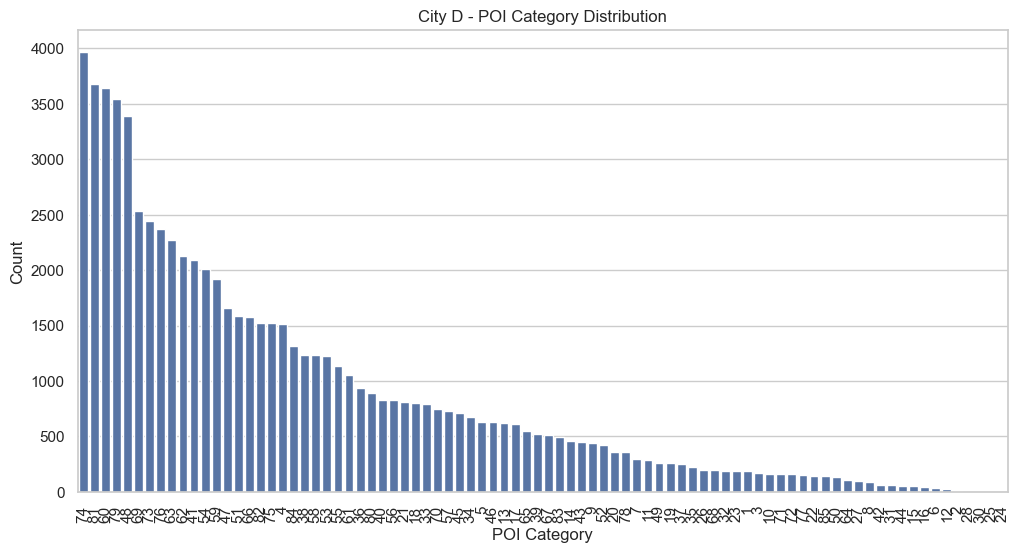

In [10]:
df_categories = load_data(poi_categories_file)
data_summary(df_categories, "POI Categories Data")

for city, poi_file_path in poi_files.items():
    df_poi = load_data(poi_file_path)
    data_summary(df_poi, f"City {city} POI Data")
    
    # Plot POI category distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_poi, x='category', order=df_poi['category'].value_counts().index)
    plt.title(f"City {city} - POI Category Distribution")
    plt.xlabel("POI Category")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()


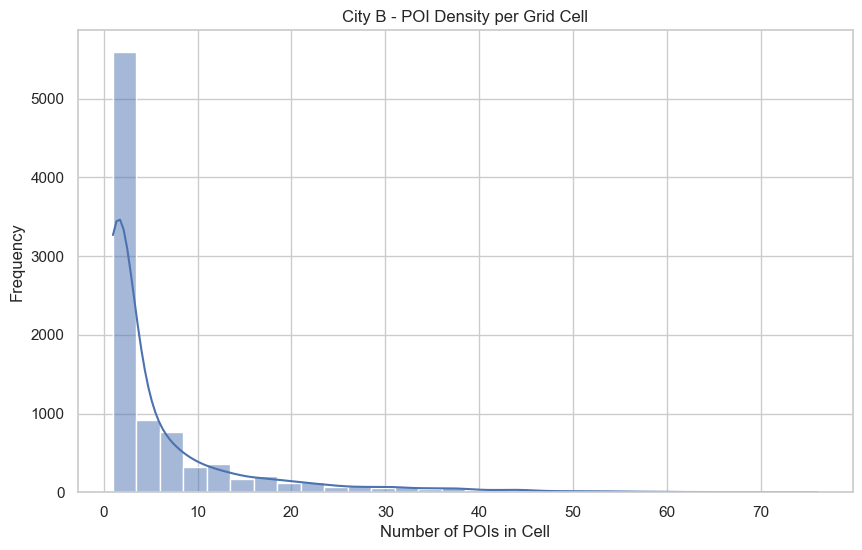

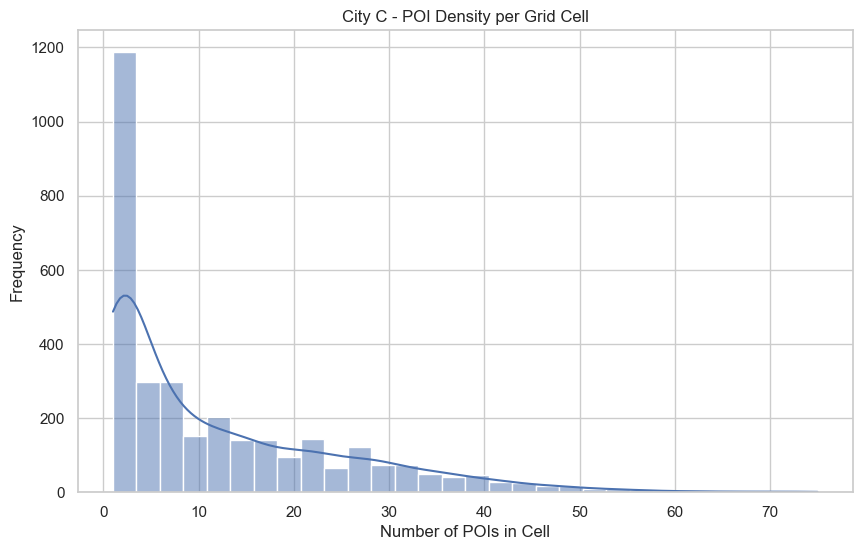

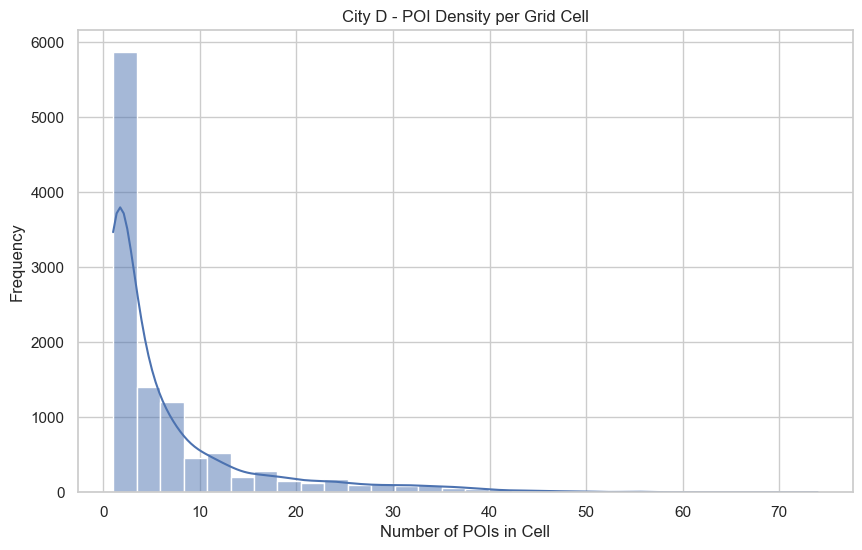

In [11]:
for city, poi_file_path in poi_files.items():
    df_poi = load_data(poi_file_path)
    
    # Calculate the number of POIs per grid cell
    poi_density = df_poi.groupby(['x', 'y']).size().reset_index(name='POI_count')
    
    plt.figure(figsize=(10, 6))
    sns.histplot(poi_density['POI_count'], bins=30, kde=True)
    plt.title(f"City {city} - POI Density per Grid Cell")
    plt.xlabel("Number of POIs in Cell")
    plt.ylabel("Frequency")
    plt.show()